<a href="https://colab.research.google.com/github/sttesta3/7506R-1C2024-GRUPO08/blob/santiago/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Seteo inicial del notebook y carga de datos

In [2]:
# General libs
import pandas as pd
import numpy as np

import geopandas as gpd
from shapely.geometry import Point

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#Modelos
from sklearn.cluster import KMeans

# KFold cross validation
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Otras librerías
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
# Ruta donde van a estar todos los datasets
ruta = "https://raw.githubusercontent.com/sttesta3/7506R-1C2024-GRUPO08/fede/datasets/"
ds = pd.read_csv(ruta + "ds_filtrado.csv")

ds.drop(columns="start_date",inplace=True)
ds.drop(columns="place_l3",inplace=True)
ds.drop(columns="property_type",inplace=True)

ds.info()

ds_train = ds
# ds_train, ds_test = train_test_split(ds, test_size=0.2 , random_state=2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52366 entries, 0 to 52365
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitud                   52366 non-null  float64
 1   longitud                  52366 non-null  float64
 2   property_rooms            52366 non-null  int64  
 3   property_bedrooms         52366 non-null  int64  
 4   property_surface_total    52366 non-null  float64
 5   property_surface_covered  52366 non-null  float64
 6   property_price            52366 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 2.8 MB


### CLUSTERING con KMEANS

#### Hopkins: Analisis de tendencia al agrupamiento

In [4]:
# Por los errores comentados por Slack ( imposibilidad de importar pyclusterend ) y por problemas en la ejecucciòn del còdigo de la catedra
# Se utilizo la siguiente función definida en el siguiente repositorio: "https://github.com/prathmachowksey/Hopkins-Statistic-Clustering-Tendency/tree/master"

#importing the required libraries
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from random import sample
from numpy.random import uniform
# function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(X):

    X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures


    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))



    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]


    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]



    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H


print("Tendencia al agrupamiento: {}%".format(round(hopkins_statistic(ds_train),4)*100))


Tendencia al agrupamiento: 99.76%


In [ ]:
import random
from sklearn.neighbors import NearestNeighbors

# Función para definir el coeficiente de Hopkins (tendencia al clustering del dataset)
def Hopkins(df,*args):
    n = df.shape[0] # filas
    d = df.shape[1] # columnas
    if not args:
        print("Numero de puntos al azar por defecto")
        m = int(0.1 * n) # cantidad de puntos al azar (default)
    else:
        m = args[0] # cantidad de puntos al azar

    nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute').fit(df) # buscador de vecinos

    rand_ind = random.sample(range(0, n, 1), m) # indices al azar

    ui = []
    wi = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(np.random.normal(size=(1, d)).reshape(1, -1), 2, return_distance=True) # distancia a los nuevos puntos
        ui.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(df[rand_ind[j]].reshape(1, -1), 2, return_distance=True) # distancia a los puntos al azar
        wi.append(w_dist[0][1])

    H = sum(wi) / (sum(ui) + sum(wi))
    return H

# hop = ds_train.drop( , axis=1)
from sklearn.preprocessing import StandardScaler

target = list(ds_train.columns.values)
hop = ds_train.drop(target, axis=1)
print(hop)
hop=StandardScaler().fit_transform(hop)
#print(Hopkins(hop))

'''
hop = StandardScaler().fit_transform(ds_train)
print( Hopkins(hop) )
'''

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[52366 rows x 0 columns]


ValueError: at least one array or dtype is required

#### KMEANS. Busqueda de cantidad de clusters optima

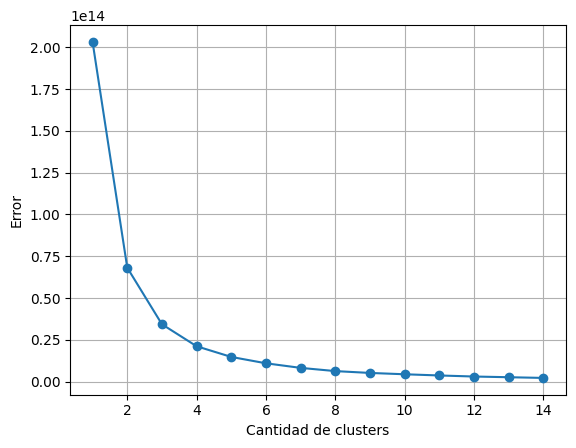

In [5]:
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.
errores = []
variacion = []

for clusters in range(1,15):
    km = KMeans(n_clusters=clusters)
    km.fit(ds_train)
    errores.append(km.inertia_)

plt.plot(range(1,15), errores,"-o")
plt.xlabel("Cantidad de clusters")
plt.ylabel("Error")
plt.grid()
plt.show()

##### ANALISIS: Hemos encontrado la cantidad óptima de clusters "aka codo" en cuatro clusters.

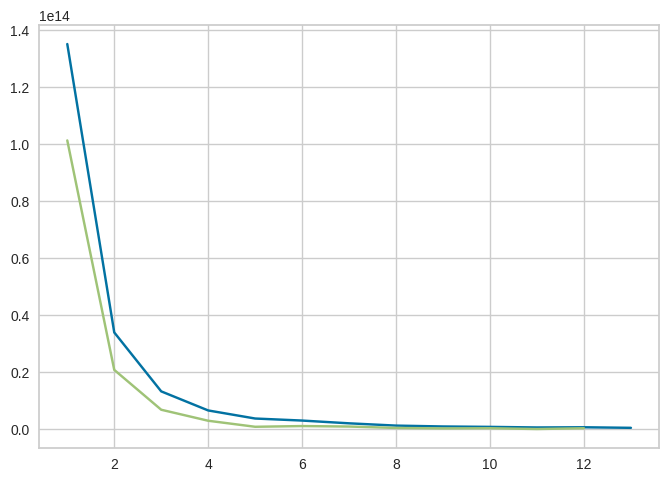

In [ ]:
# Experimental para el  codo, guardado por las dudas
variacion = []
aceleracion = []

for i in range(1,len(errores)):
  variacion.append(errores[i-1] - errores[i])

for i in range(1,len(variacion)):
  aceleracion.append(variacion[i-1] - variacion[i])

plt.plot(range(1,len(errores)),variacion)
plt.plot(range(1,len(variacion)),aceleracion)
plt.show()

#### SILHOUETTE

In [ ]:
# Esto es probablemente innecesario, pero sabemos que hay tendencia al cluster en los datos
from sklearn.metrics import silhouette_score

for n_clusters in range(2, 7):
    km = KMeans(n_clusters=n_clusters)
    preds = km.fit_predict(ds_train)

    score = silhouette_score (ds_train, preds)
    print ("For n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

For n_clusters =2 silhouette score is 0.6333879515346814
For n_clusters =3 silhouette score is 0.5780572424196573
For n_clusters =4 silhouette score is 0.5681562682105815
For n_clusters =5 silhouette score is 0.5538689322932128
For n_clusters =6 silhouette score is 0.5349652731703871


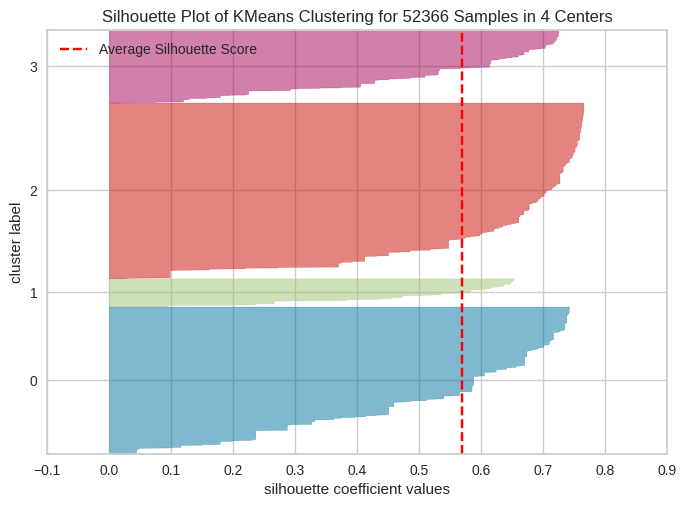

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 52366 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [7]:
from yellowbrick.cluster import SilhouetteVisualizer

modelo = KMeans(4, random_state=0)

# Visualizamos el gráfico de silueta
visualizador = SilhouetteVisualizer(modelo, colors='yellowbrick')    # Instancio el visualizador
visualizador.fit(ds_train)
visualizador.show()


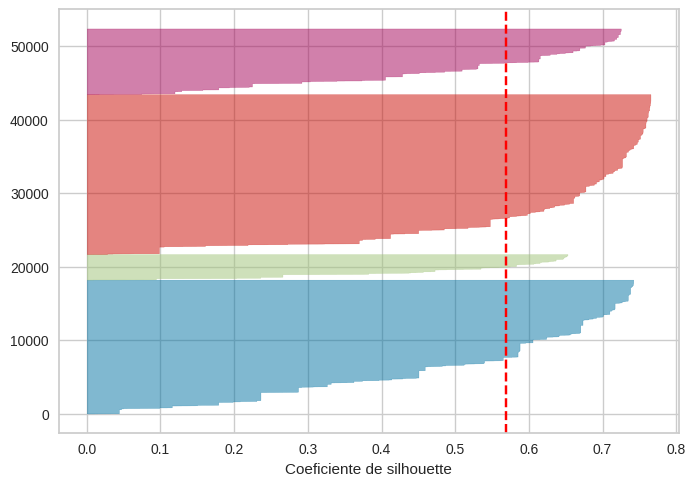

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizador_2= SilhouetteVisualizer(modelo, colors='yellowbrick')    # Instancio el visualizador
visualizador_2.fit(ds_train)
plt.xlabel("Coeficiente de silhouette")
plt.show()

##### Pequeña prueba de resultado con distinta cantidad de clusters

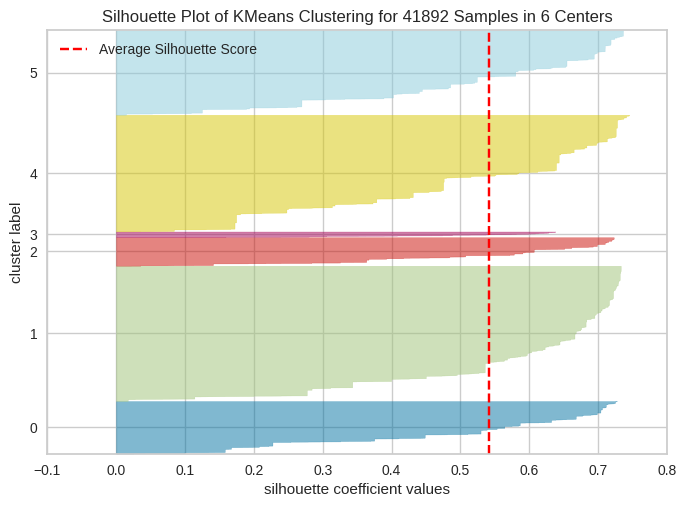

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 41892 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
## Comparativa con seis. Practicamente mismo resultado y dos dummies
modelo_test = KMeans(6, random_state=0)

visualizador_test= SilhouetteVisualizer(modelo_test, colors='yellowbrick')    # Instancio el visualizador
visualizador_test.fit(ds_train)
visualizador_test.show()

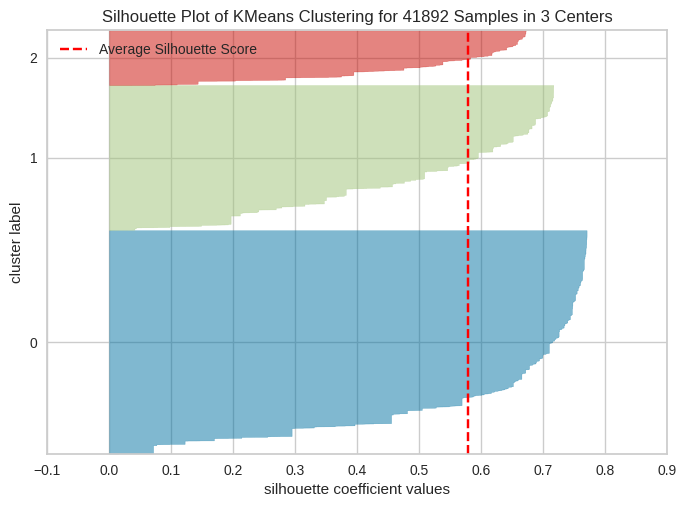

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 41892 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
modelo_test_3 = KMeans(3, random_state=0)

visualizador_test_3= SilhouetteVisualizer(modelo_test_3, colors='yellowbrick')    # Instancio el visualizador
visualizador_test_3.fit(ds_train)
visualizador_test_3.show()

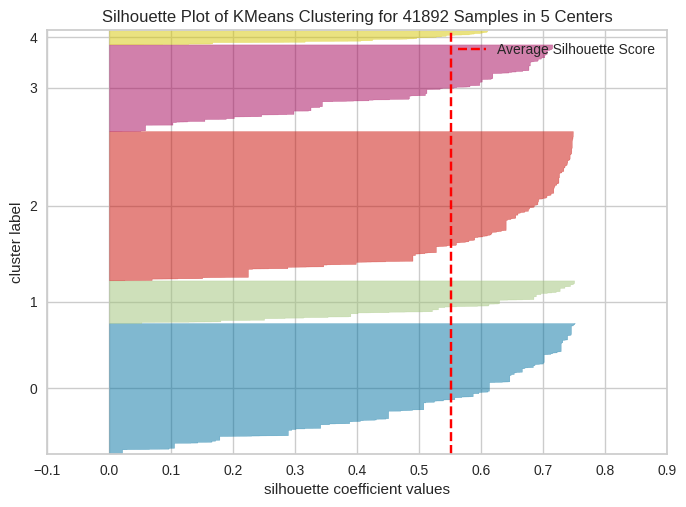

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 41892 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
modelo_test_5 = KMeans(5, random_state=0)

visualizador_test_5= SilhouetteVisualizer(modelo_test_5, colors='yellowbrick')    # Instancio el visualizador
visualizador_test_5.fit(ds_train)
visualizador_test_5.show()

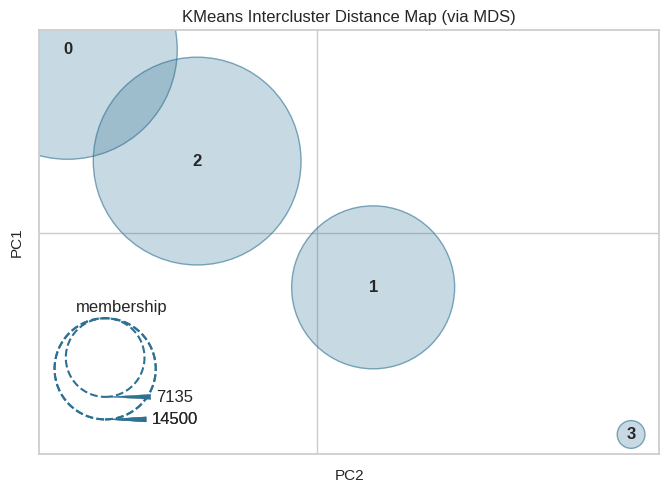

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [ ]:
# EXPERIMENTAL. Distancia con MDS para reducir dimensiones
from yellowbrick.cluster import InterclusterDistance

visualizador_mds = InterclusterDistance(modelo)
visualizador_mds.fit(ds_train)
visualizador_mds.show()

##### ANALISIS: Podemos observar que los clusters tienen un promedio del coeficiente de silhouette similar ( entre un 0.5 y 0.6 ) pero tienen densidades diferentes, donde el azul y el rojo tienen aproximadamente mil quinientas observaciones cada uno, mientras que los otros dos parecerían tener quinientas.

#### MAPAs DE CABA

In [36]:
ds_train[modelo.labels_==0]

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
8,-34.633471,-58.361686,3,2,65.0,65.0,115000.0
12,-34.638098,-58.369056,3,2,69.0,60.0,129000.0
21,-34.629768,-58.367377,3,2,59.0,56.0,110000.0
35,-34.626809,-58.361325,4,3,70.0,70.0,165000.0
36,-34.627401,-58.361363,4,3,74.0,74.0,120000.0
...,...,...,...,...,...,...,...
52346,-34.677576,-58.452250,3,2,79.0,70.0,125000.0
52348,-34.661337,-58.425486,3,2,122.0,100.0,115000.0
52350,-34.675649,-58.453912,3,2,84.0,70.0,113000.0
52354,-34.662090,-58.436289,2,1,42.0,38.0,130000.0


In [32]:
# https://stackoverflow.com/questions/36195457/how-to-get-the-samples-in-each-cluster
cluster_maps = []
for i in range(0,4):
  cluster_maps.append(pd.DataFrame())
  cluster_maps[i]['data_index'] = ds_train.index.values
  cluster_maps[i]['cluster'] = modelo.labels_
  cluster_maps[i][cluster_maps[i].cluster == i]

cluster_maps[1]

,data_index,cluster
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
52361,52361,2
52362,52362,2
52363,52363,2
52364,52364,2


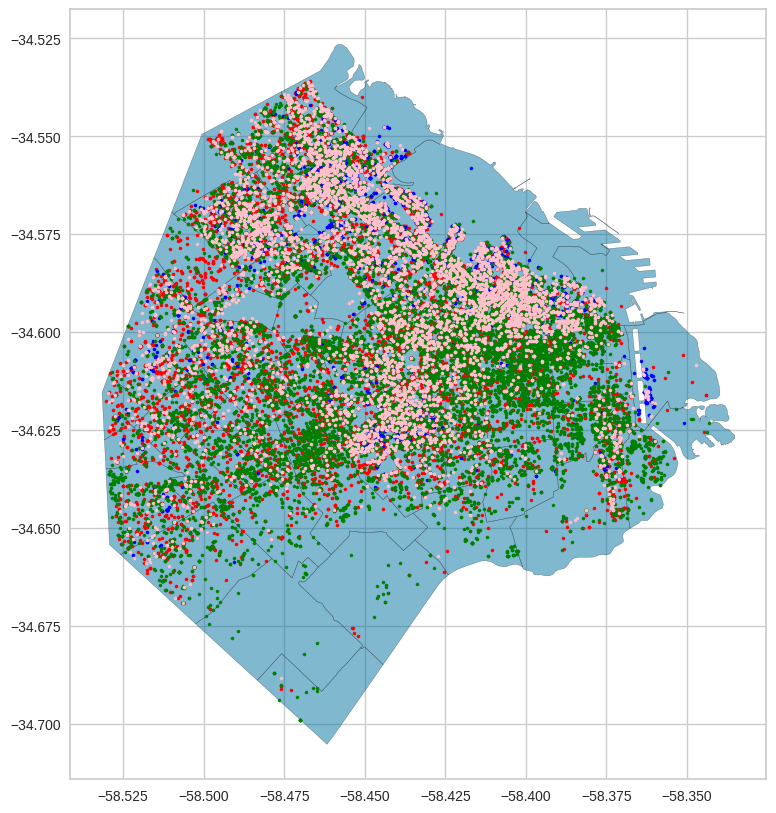

In [38]:
# Paso 1: Filtramos puntos dentro de los límites de CABA utilizando el archivo GeoJSON de barrios
# Cargar el archivo GeoJSON de los barrios de CABA
barrios_caba = gpd.read_file(ruta + "barrios_caba.geojson")

# Convertir latitud y longitud en puntos geométricos
geometrias = []
for i in range(0,4):
  geometrias.append([Point(xy) for xy in zip(ds_train[modelo.labels_== i]["longitud"], ds_train[modelo.labels_== i]["latitud"]) ])

crs = {"init": "epsg:4326"}  # Sistema de coordenadas WGS84

# Crear un GeoDataFrame a partir del DataFrame limpio y los puntos geométricos
gdfs_propiedades = []
for i in range(0,4):
  gdfs_propiedades.append(
      gpd.GeoDataFrame(
        ds_train[modelo.labels_== i],
        crs=crs,
        geometry=geometrias[i]
      )
  )

# Realizar una operación de espacio para encontrar los puntos dentro de los límites de CABA
'''
gdf_properati_caba = gpd.sjoin(
    gdf_properati,
    barrios_caba,
    how="inner",
    op="within"
    )
'''

# Paso 2: Plotear el resultado sobre un mapa
import matplotlib.pyplot as plt

# Plotear los barrios de CABA
barrios_caba.plot(
    alpha=0.5,
    edgecolor="k",
    figsize=(10, 10)
    )

def selector_color(i=int):
  if i == 0:
    return "red"
  elif i == 1:
    return "blue"
  elif i == 2:
    return "green"
  elif i == 3:
    return "pink"


# Plotear los puntos filtrados
for i in range(0,4):
  gdfs_propiedades[i].plot(
    ax=plt.gca(),
    marker="o",
    color=selector_color(i),
    markersize=5
    )

'''
gdf_properati_caba.plot(
    ax=plt.gca(),
    marker="o",
    color="red",
    markersize=5
    )
'''

# Muestro toda la grafica.
plt.show()

# Paso 3: Me quedo solo con los puntos de interes del dataset.

# Obtener los índices de las filas filtradas en gdf_properati_caba
#indices_filtrados = gdf_properati_caba.index

# Limpiar el DataFrame original usando los índices filtrados
#ds_properati = ds_train.loc[indices_filtrados]

# Reindexar el DataFrame para actualizar los índices
#ds_properati.reset_index(drop=True, inplace=True)

# Ahora ds_properati contendrá solo los datos que están dentro de los límites de CABA y tendrá índices actualizados